# Importing the Necessary Libraries

In [509]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Loading the Dataset

In [510]:
df = pd.read_csv('data/indian domestic Flight Details Year-Month Wise.csv')

# Observation of the Dataset

In [511]:
df

,AIRLINES,YEAR,MONTH,DEPARTURES\n(IN NUMBER),HOURS\n(IN NUMBER),KILOMETRE\n(IN THOUSAND),PASSENGERS CARRIED\n(IN NUMBER),PASSENGER KMS.PERFORMED\n(IN THOUSAND),AVAILABLE SEAT KILOMETRE\n(IN THOUSAND),PAX.LOAD FACTOR#\n(IN %),FREIGHT\n(IN TONNE),MAIL\n(IN TONNE),TOTAL\n(IN TONNE),PASSENGER\n(IN THOUSAND),FREIGHT\n(IN THOUSAND),MAIL\n(IN THOUSAND),TOTAL\n(IN THOUSAND),AVAILABLE TONNE KILOMETRE\n(IN THOUSAND),WEIGHT LOAD FACTOR##\n(IN %)
0,AIR ASIA,2021,JAN,4495,8590.400000,4621.139,531578,558871.307,836264.022,66.829529,3175.7262,230.1885,3405.9147,37494.472880,4067.437374,269.242257,41831.152510,92422.78,45.260652
1,AIR ASIA,2021,FEB,4340,8239.033333,4417.000,520603,542276.763,798746.808,67.890946,3410.6377,211.8922,3622.5299,39555.584100,4264.010976,251.988624,44071.583700,88341.12,49.887961
2,AIR ASIA,2021,MAR,4727,9023.300000,4855.674,541512,572123.104,878405.634,65.131994,3662.2624,211.7535,3874.0159,38524.441950,4577.131657,280.847992,43382.421600,97113.48,44.671884
3,AIR ASIA,2021,APR,3195,6341.383333,3481.586,354878,403399.335,630122.874,64.019154,2487.1216,169.2380,2656.3596,27963.798660,3332.789591,208.044115,31504.632370,69631.72,45.244656
4,AIR ASIA,2021,MAY,809,1562.150000,867.183,63532,70007.636,157745.280,44.380178,1344.1482,57.5075,1401.6557,4039.994933,1744.005877,114.999778,5899.000588,17343.66,34.012432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,AIR PEGASUS,2015,AUG,292,335.430000,127.020,14480,6305.010,8180.000,77.078362,103.9400,0.0000,103.9400,1021.640000,103.940000,0.000000,1125.580000,1631.15,69.005303
1208,AIR PEGASUS,2015,SEP,318,365.240000,133.174,15271,6401.000,8741.000,73.229608,92.1900,0.0000,92.1900,1112.050000,92.190000,0.000000,1204.240000,1795.37,67.074753
1209,AIR PEGASUS,2015,OCT,383,428.140000,158.850,19484,8089.000,10466.000,77.288362,128.5110,0.0000,128.5110,1411.360000,52.758200,0.000000,1464.118200,2279.51,64.229514
1210,AIR PEGASUS,2015,NOV,440,480.000000,176.220,22296,9081.074,11630.520,78.079690,147.1720,0.0000,147.1720,1617.380000,59.417000,0.000000,1676.797000,2634.17,63.655611


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   AIRLINES                                 1212 non-null   object 
 1   YEAR                                     1212 non-null   int64  
 2   MONTH                                    1212 non-null   object 
 3   DEPARTURES
(IN NUMBER)                   1212 non-null   int64  
 4   HOURS
(IN NUMBER)                        1212 non-null   float64
 5   KILOMETRE
(IN THOUSAND)                  1212 non-null   float64
 6   PASSENGERS CARRIED
(IN NUMBER)           1212 non-null   int64  
 7   PASSENGER KMS.PERFORMED
(IN THOUSAND)    1212 non-null   float64
 8   AVAILABLE SEAT KILOMETRE
(IN THOUSAND)   1212 non-null   float64
 9    PAX.LOAD FACTOR#
(IN %)                 1212 non-null   float64
 10   FREIGHT
(IN TONNE)                      1212 no

# Checking for the Null values in dataset

In [513]:
df.isnull().sum()

AIRLINES                                    0
YEAR                                        0
MONTH                                       0
DEPARTURES\n(IN NUMBER)                     0
HOURS\n(IN NUMBER)                          0
KILOMETRE\n(IN THOUSAND)                    0
PASSENGERS CARRIED\n(IN NUMBER)             0
PASSENGER KMS.PERFORMED\n(IN THOUSAND)      0
AVAILABLE SEAT KILOMETRE\n(IN THOUSAND)     0
 PAX.LOAD FACTOR#\n(IN %)                   0
 FREIGHT\n(IN TONNE)                        0
MAIL\n(IN TONNE)                            0
 TOTAL\n(IN TONNE)                          0
 PASSENGER\n(IN THOUSAND)                   0
FREIGHT\n(IN THOUSAND)                      0
 MAIL\n(IN THOUSAND)                        0
 TOTAL\n(IN THOUSAND)                       0
AVAILABLE TONNE KILOMETRE\n(IN THOUSAND)    1
 WEIGHT LOAD FACTOR##\n(IN %)               1
dtype: int64

In [514]:
df.dropna(inplace=True)

# Cleaning the Columns

In [515]:
df.columns = (
    df.columns
      .str.replace('\n', ' ', regex=False)   # remove newlines
      .str.replace('#', '', regex=False)     # remove '#' symbols
      .str.strip()                           # remove leading/trailing spaces
      .str.lower()                           # lowercase everything
      .str.replace(' ', '_', regex=False)    # replace spaces with underscores
)


In [516]:
df['month'].unique()

array(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'], dtype=object)

# Sorting the data year wise in ascending order for better interpretability

In [517]:
month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 
               'JULY', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df = df.sort_values(by=['year', 'month'], ascending=[True, True]).reset_index(drop=True)

# Adding the date column

In [518]:
df['month'] = df['month'].str.title()
df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(str), format='mixed')
df.insert(2, 'date', df.pop('date'))

df.head()

,airlines,year,date,month,departures_(in_number),hours_(in_number),kilometre_(in_thousand),passengers_carried_(in_number),passenger_kms.performed_(in_thousand),available_seat_kilometre_(in_thousand),pax.load_factor_(in_%),freight_(in_tonne),mail_(in_tonne),total_(in_tonne),passenger_(in_thousand),freight_(in_thousand),mail_(in_thousand),total_(in_thousand),available_tonne_kilometre_(in_thousand),weight_load_factor_(in_%)
0,AIR ASIA,2015,2015-01-01,Jan,598,784.40,501.0,81434,68778.0,90176.0,76.270848,529.3,0.0,529.3,5803.1,619.40,0.00,6422.50,1.346190e+04,47.708719
1,VISTARA,2015,2015-01-01,Jan,216,291.16,206.0,14999,13843.0,30480.0,45.416667,0.0,0.0,0.0,1038.0,0.00,0.00,1038.00,2.971845e+03,34.927797
2,INDIGO,2015,2015-01-01,Jan,16280,28759.21,15520.0,2276404,2378975.0,2793463.0,85.162216,9801.0,899.0,10700.0,214082.0,11946.00,1081.00,227109.00,2.824570e+05,80.404805
3,AIR INDIA EXPRESS,2015,2015-01-01,Jan,71,122.00,60.0,14633,9403.0,11163.0,84.233629,0.0,0.0,0.0,979.1,5.53,0.02,984.65,1.586710e+03,62.056078
4,BLUE DART,2015,2015-01-01,Jan,469,834.00,435.0,0,0.0,0.0,0.000000,10218.8,0.0,10218.8,0.0,9822480.00,0.00,9822480.00,1.366091e+07,71.900000


# Count for the airlines
As to check for the time contribution of the Airlines

In [519]:
df['airlines'].value_counts()

airlines
AIR ASIA             84
VISTARA              84
INDIGO               84
AIR INDIA EXPRESS    84
BLUE DART            84
GO AIR               84
SPICE JET            84
TRUE JET             84
ALLIANCE AIR         84
AIR INDIA            84
JET AIRWAYS          60
JETLITE              60
AIR COSTA            36
PAWAN HANS           36
STAR AIR             36
AIR PEGASUS          24
AIR CARNIVAL         24
ZOOM AIR             24
AIR HERITAGE         24
DECCAN AIR           23
FLY BIG              12
AIR TAXI             12
Name: count, dtype: int64

In [520]:
fig = px.bar(data_frame=df, x='airlines', title='Count of Flights by Airline')
fig.update_layout(xaxis_tickangle=45)
fig.show()

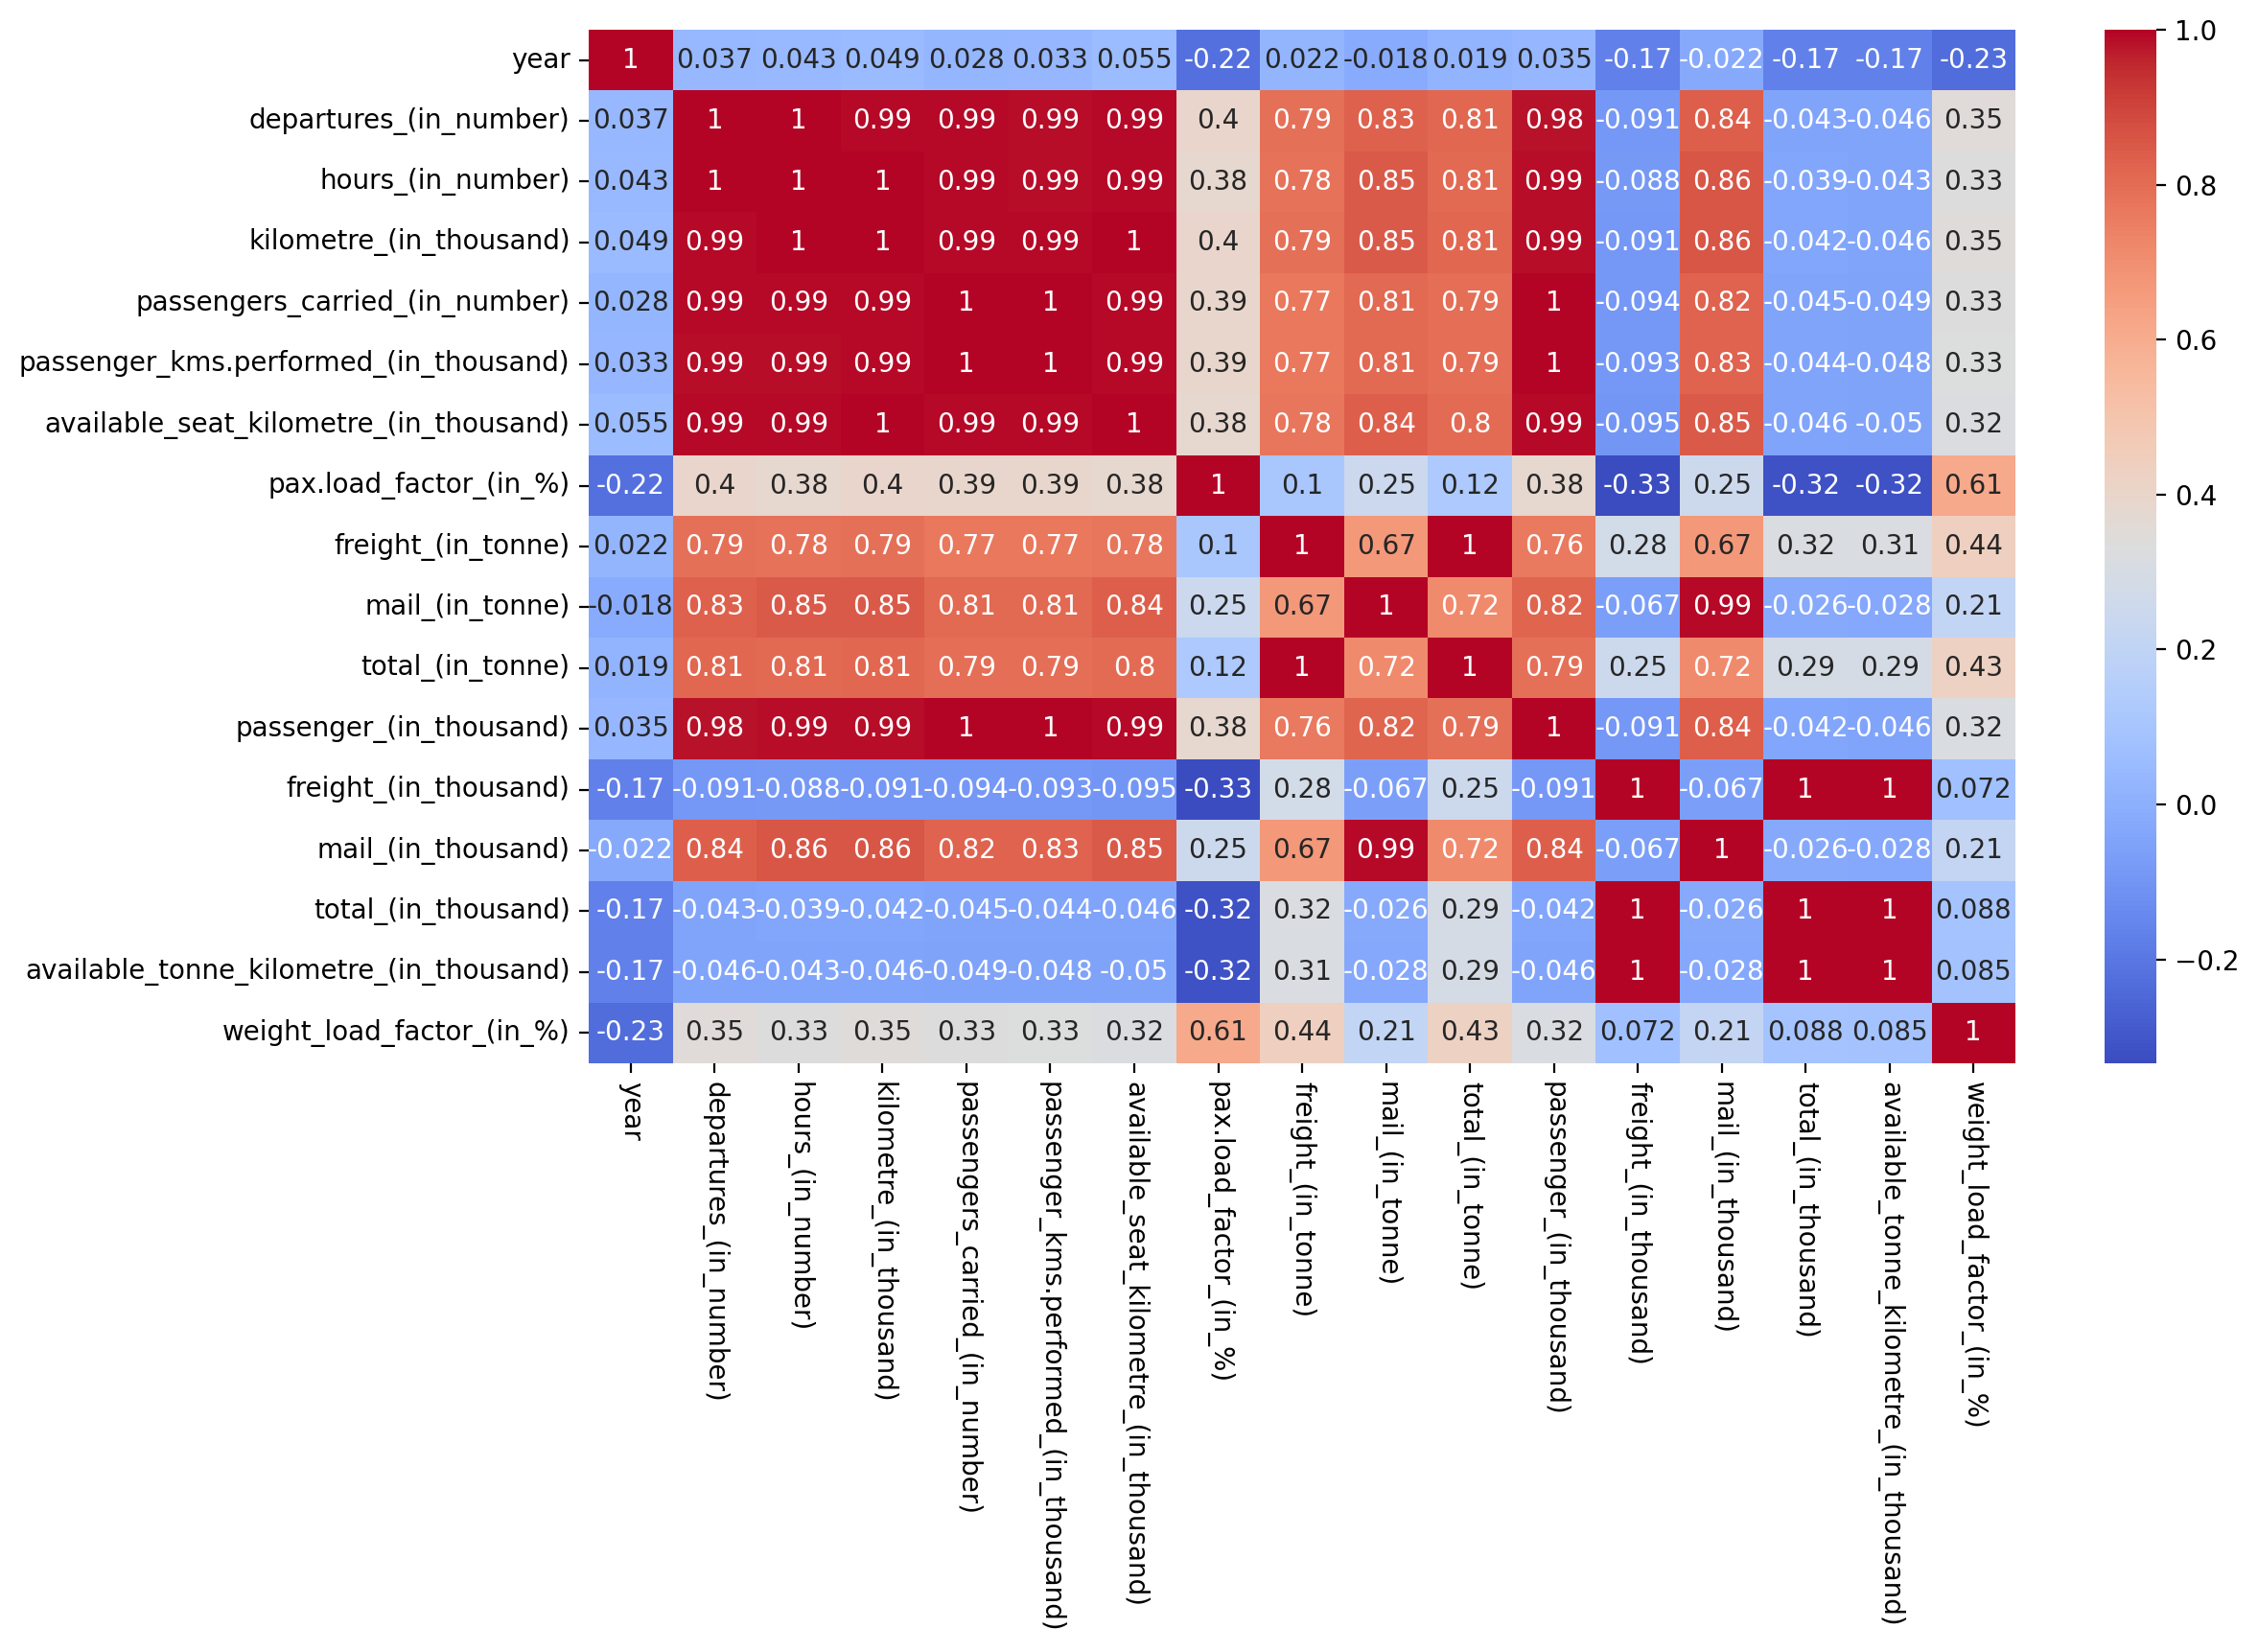

In [521]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,7), dpi=200)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=270)
plt.show()

In [522]:
df_passenger = df[['airlines', 'year', 'date', 'month', 'departures_(in_number)', 'hours_(in_number)', 'kilometre_(in_thousand)', 'passengers_carried_(in_number)', 'passenger_kms.performed_(in_thousand)', 'available_seat_kilometre_(in_thousand)', 'pax.load_factor_(in_%)']]
df_cargo = df[['airlines', 'year', 'date', 'month', 'departures_(in_number)', 'hours_(in_number)', 'kilometre_(in_thousand)', 'freight_(in_tonne)',	'mail_(in_tonne)', 'total_(in_tonne)', 'passenger_(in_thousand)', 'freight_(in_thousand)', 'mail_(in_thousand)', 'total_(in_thousand)', 'available_tonne_kilometre_(in_thousand)', 'weight_load_factor_(in_%)']]

In [523]:
df_cargo[df_cargo['airlines'] == 'PAWAN HANS'].describe()

,year,date,departures_(in_number),hours_(in_number),kilometre_(in_thousand),freight_(in_tonne),mail_(in_tonne),total_(in_tonne),passenger_(in_thousand),freight_(in_thousand),mail_(in_thousand),total_(in_thousand),available_tonne_kilometre_(in_thousand),weight_load_factor_(in_%)
count,36.000000,36,36.000000,36.000000,36.000000,36.0,36.0,36.0,36.000000,36.0,36.0,36.000000,36.000000,36.000000
mean,2020.000000,2020-06-16 02:40:00,56.472222,36.196287,4.803778,0.0,0.0,0.0,623.396813,0.0,0.0,623.396813,1616.928013,30.879914
min,2019.000000,2019-01-01 00:00:00,9.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,2019.000000,2019-09-23 12:00:00,32.500000,21.085000,2.810000,0.0,0.0,0.0,0.816750,0.0,0.0,0.816750,2.122095,9.798217
50%,2020.000000,2020-06-16 00:00:00,64.000000,42.080000,5.627000,0.0,0.0,0.0,172.500000,0.0,0.0,172.500000,1247.500000,33.377917
75%,2021.000000,2021-03-08 18:00:00,80.000000,52.789000,7.024500,0.0,0.0,0.0,1093.000000,0.0,0.0,1093.000000,3033.500000,40.401492
max,2021.000000,2021-12-01 00:00:00,102.000000,70.000000,9.418000,0.0,0.0,0.0,2440.000000,0.0,0.0,2440.000000,5285.000000,80.555556
std,0.828079,NaN,30.811395,22.634199,3.002754,0.0,0.0,0.0,729.406769,0.0,0.0,729.406769,1729.532221,22.078005


# Removing Blue Dart and Pawan Hans because they are only for cargo and helicopter services respectively

In [524]:
df_passenger = df_passenger[(df_passenger['airlines'] != 'BLUE DART') & (df_passenger['airlines'] != 'PAWAN HANS')]
df_cargo = df_cargo[df_cargo['airlines'] != 'PAWAN HANS']

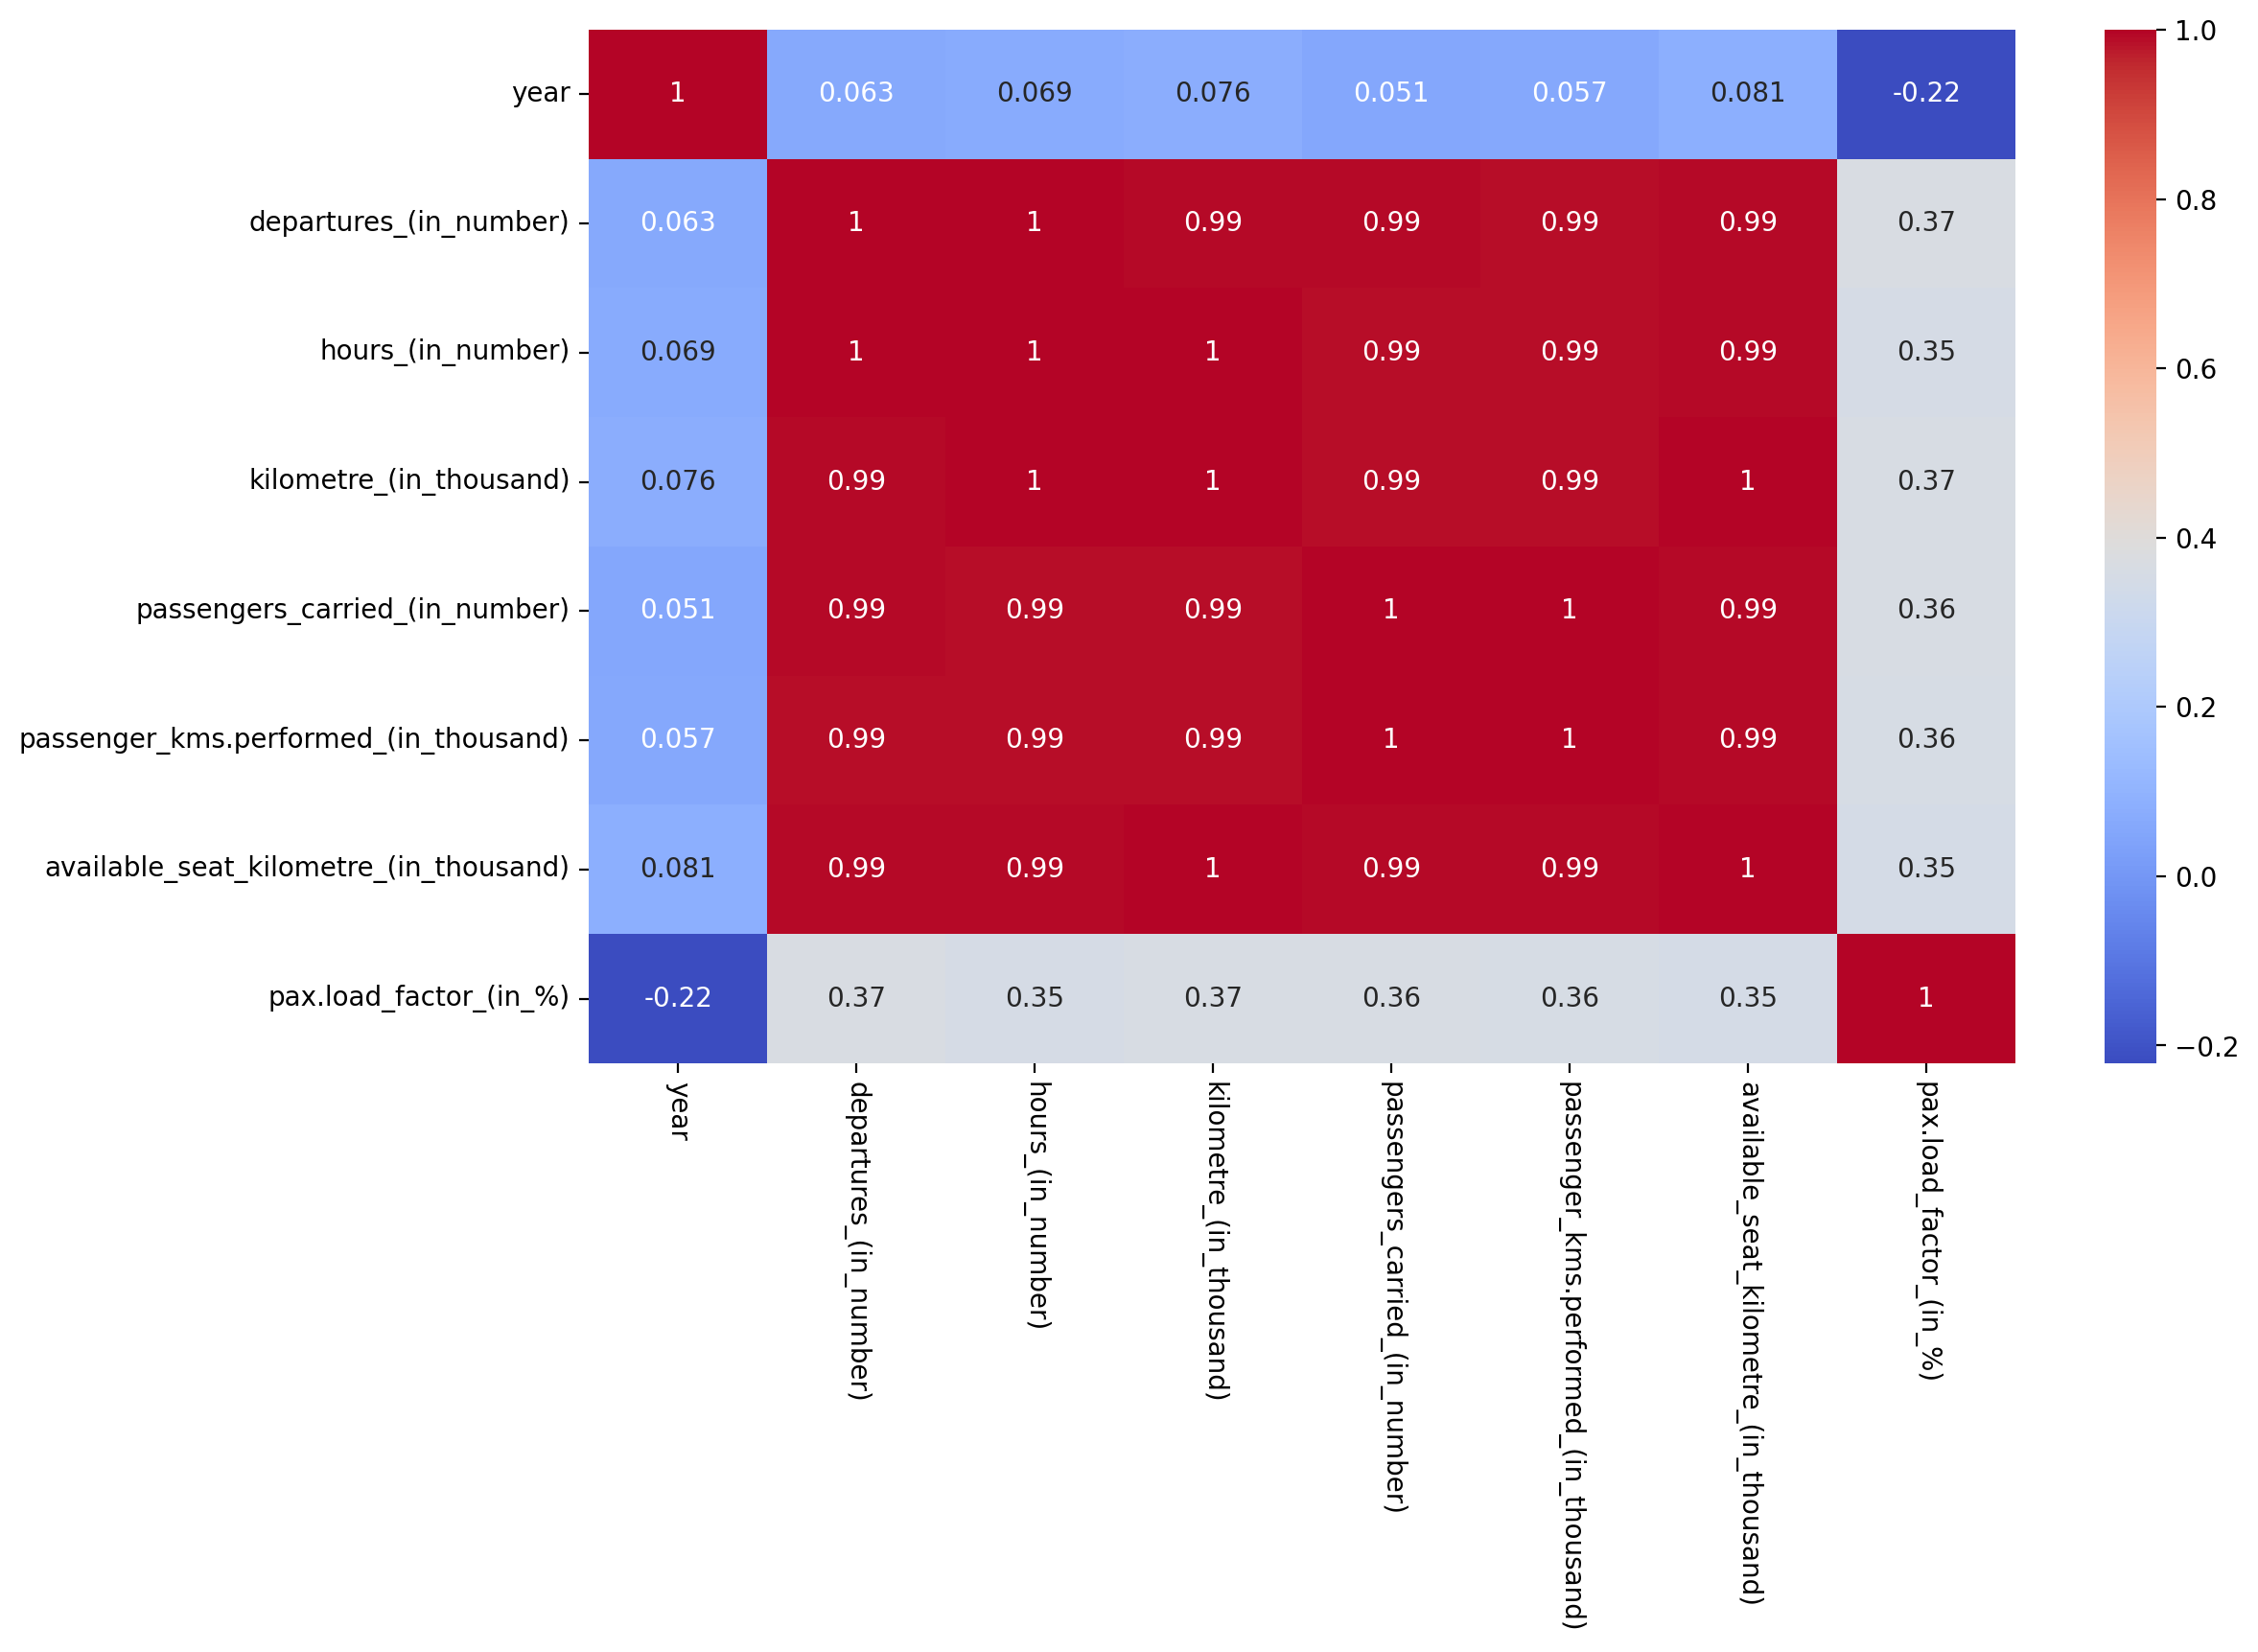

In [525]:
corr = df_passenger.corr(numeric_only=True)
plt.figure(figsize=(12,7), dpi=200)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=270)
plt.show()

# Year wise number of passengers carried by Airlines

In [526]:
fig = px.line(data_frame=df_passenger, x='date', y='passengers_carried_(in_number)', color='airlines', height=600)
fig.show()

# Year wise number of Departure by Airlines

In [527]:
fig = px.line(data_frame=df_passenger, x='date', y='departures_(in_number)', color='airlines', height=600)
fig.show()

# Year wise number of hours flew by Airlines

In [528]:
fig = px.line(data_frame=df_passenger, x='date', y='hours_(in_number)', color='airlines', height=600)
fig.show()

# Year wise number of Kilometers flew by Airlines

In [529]:
fig = px.line(data_frame=df_passenger, x='date', y='kilometre_(in_thousand)', color='airlines', height=600)
fig.show()

In [530]:
fig = px.line(data_frame=df_passenger, x='date', y='pax.load_factor_(in_%)', color='airlines')
fig.show()

In [531]:
monthly_pax = df_passenger.groupby(['date', 'airlines'])['pax.load_factor_(in_%)'].sum().reset_index()
monthly_pax

,date,airlines,pax.load_factor_(in_%)
0,2015-01-01,AIR ASIA,76.270848
1,2015-01-01,AIR COSTA,76.491852
2,2015-01-01,AIR INDIA,82.633667
3,2015-01-01,AIR INDIA EXPRESS,84.233629
4,2015-01-01,AIR PEGASUS,0.000000
...,...,...,...
1086,2021-12-01,INDIGO,80.192488
1087,2021-12-01,SPICE JET,85.959290
1088,2021-12-01,STAR AIR,82.260769
1089,2021-12-01,TRUE JET,66.958434


In [532]:
max_pax_per_month = monthly_pax.loc[monthly_pax.groupby('date')['pax.load_factor_(in_%)'].idxmax()].reset_index(drop=True)

In [533]:
fig = px.bar(data_frame=max_pax_per_month, x='date', y='pax.load_factor_(in_%)', color='airlines', color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

In [534]:
monthly_pass = df_passenger.groupby(['date', 'airlines'])['passengers_carried_(in_number)'].sum().reset_index()
total_pass_per_month = monthly_pass.groupby('date')['passengers_carried_(in_number)'].sum().reset_index()

In [535]:
fig = px.bar(data_frame=total_pass_per_month, x='date', y='passengers_carried_(in_number)')
fig.show()

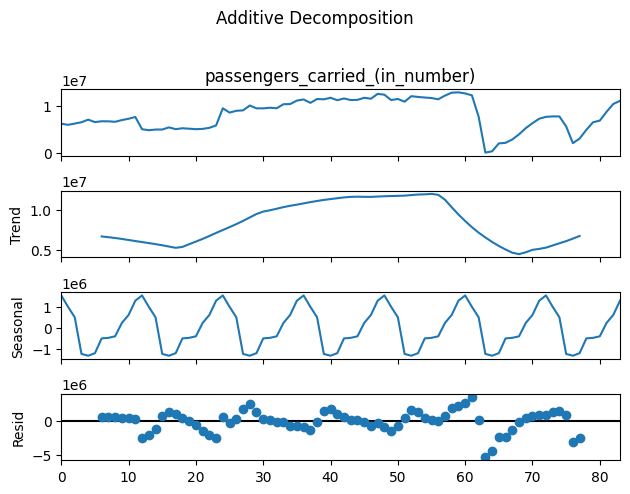

In [536]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result_additive = seasonal_decompose(total_pass_per_month['passengers_carried_(in_number)'], model='additive', period=12)
result_additive.plot()
plt.suptitle('Additive Decomposition', y=1.02) 
plt.tight_layout()
plt.show()

In [537]:
df_passenger['hour_per_departure'] = df_passenger['hours_(in_number)']/df_passenger['departures_(in_number)']
df_passenger.insert(4, 'hour_per_departure', df_passenger.pop('hour_per_departure'))
df_passenger.drop(['departures_(in_number)','hours_(in_number)'], axis=1, inplace=True)
df_passenger

,airlines,year,date,month,hour_per_departure,kilometre_(in_thousand),passengers_carried_(in_number),passenger_kms.performed_(in_thousand),available_seat_kilometre_(in_thousand),pax.load_factor_(in_%)
0,AIR ASIA,2015,2015-01-01,Jan,1.311706,501.000,81434,68778.000,90176.000,76.270848
1,VISTARA,2015,2015-01-01,Jan,1.347963,206.000,14999,13843.000,30480.000,45.416667
2,INDIGO,2015,2015-01-01,Jan,1.766536,15520.000,2276404,2378975.000,2793463.000,85.162216
3,AIR INDIA EXPRESS,2015,2015-01-01,Jan,1.718310,60.000,14633,9403.000,11163.000,84.233629
5,GO AIR,2015,2015-01-01,Jan,1.889790,3830.000,552971,533961.000,674072.000,79.214238
...,...,...,...,...,...,...,...,...,...,...
1205,ALLIANCE AIR,2021,2021-12-01,Dec,1.282982,2263.000,125358,56284.000,84022.000,66.987218
1206,AIR INDIA,2021,2021-12-01,Dec,1.952629,8982.624,935686,988332.989,1292699.302,76.454980
1207,STAR AIR,2021,2021-12-01,Dec,1.443613,414.068,21315,17030.776,20703.400,82.260769
1209,FLY BIG,2021,2021-12-01,Dec,1.199588,1315.220,10244,3984.020,6513.120,61.169148


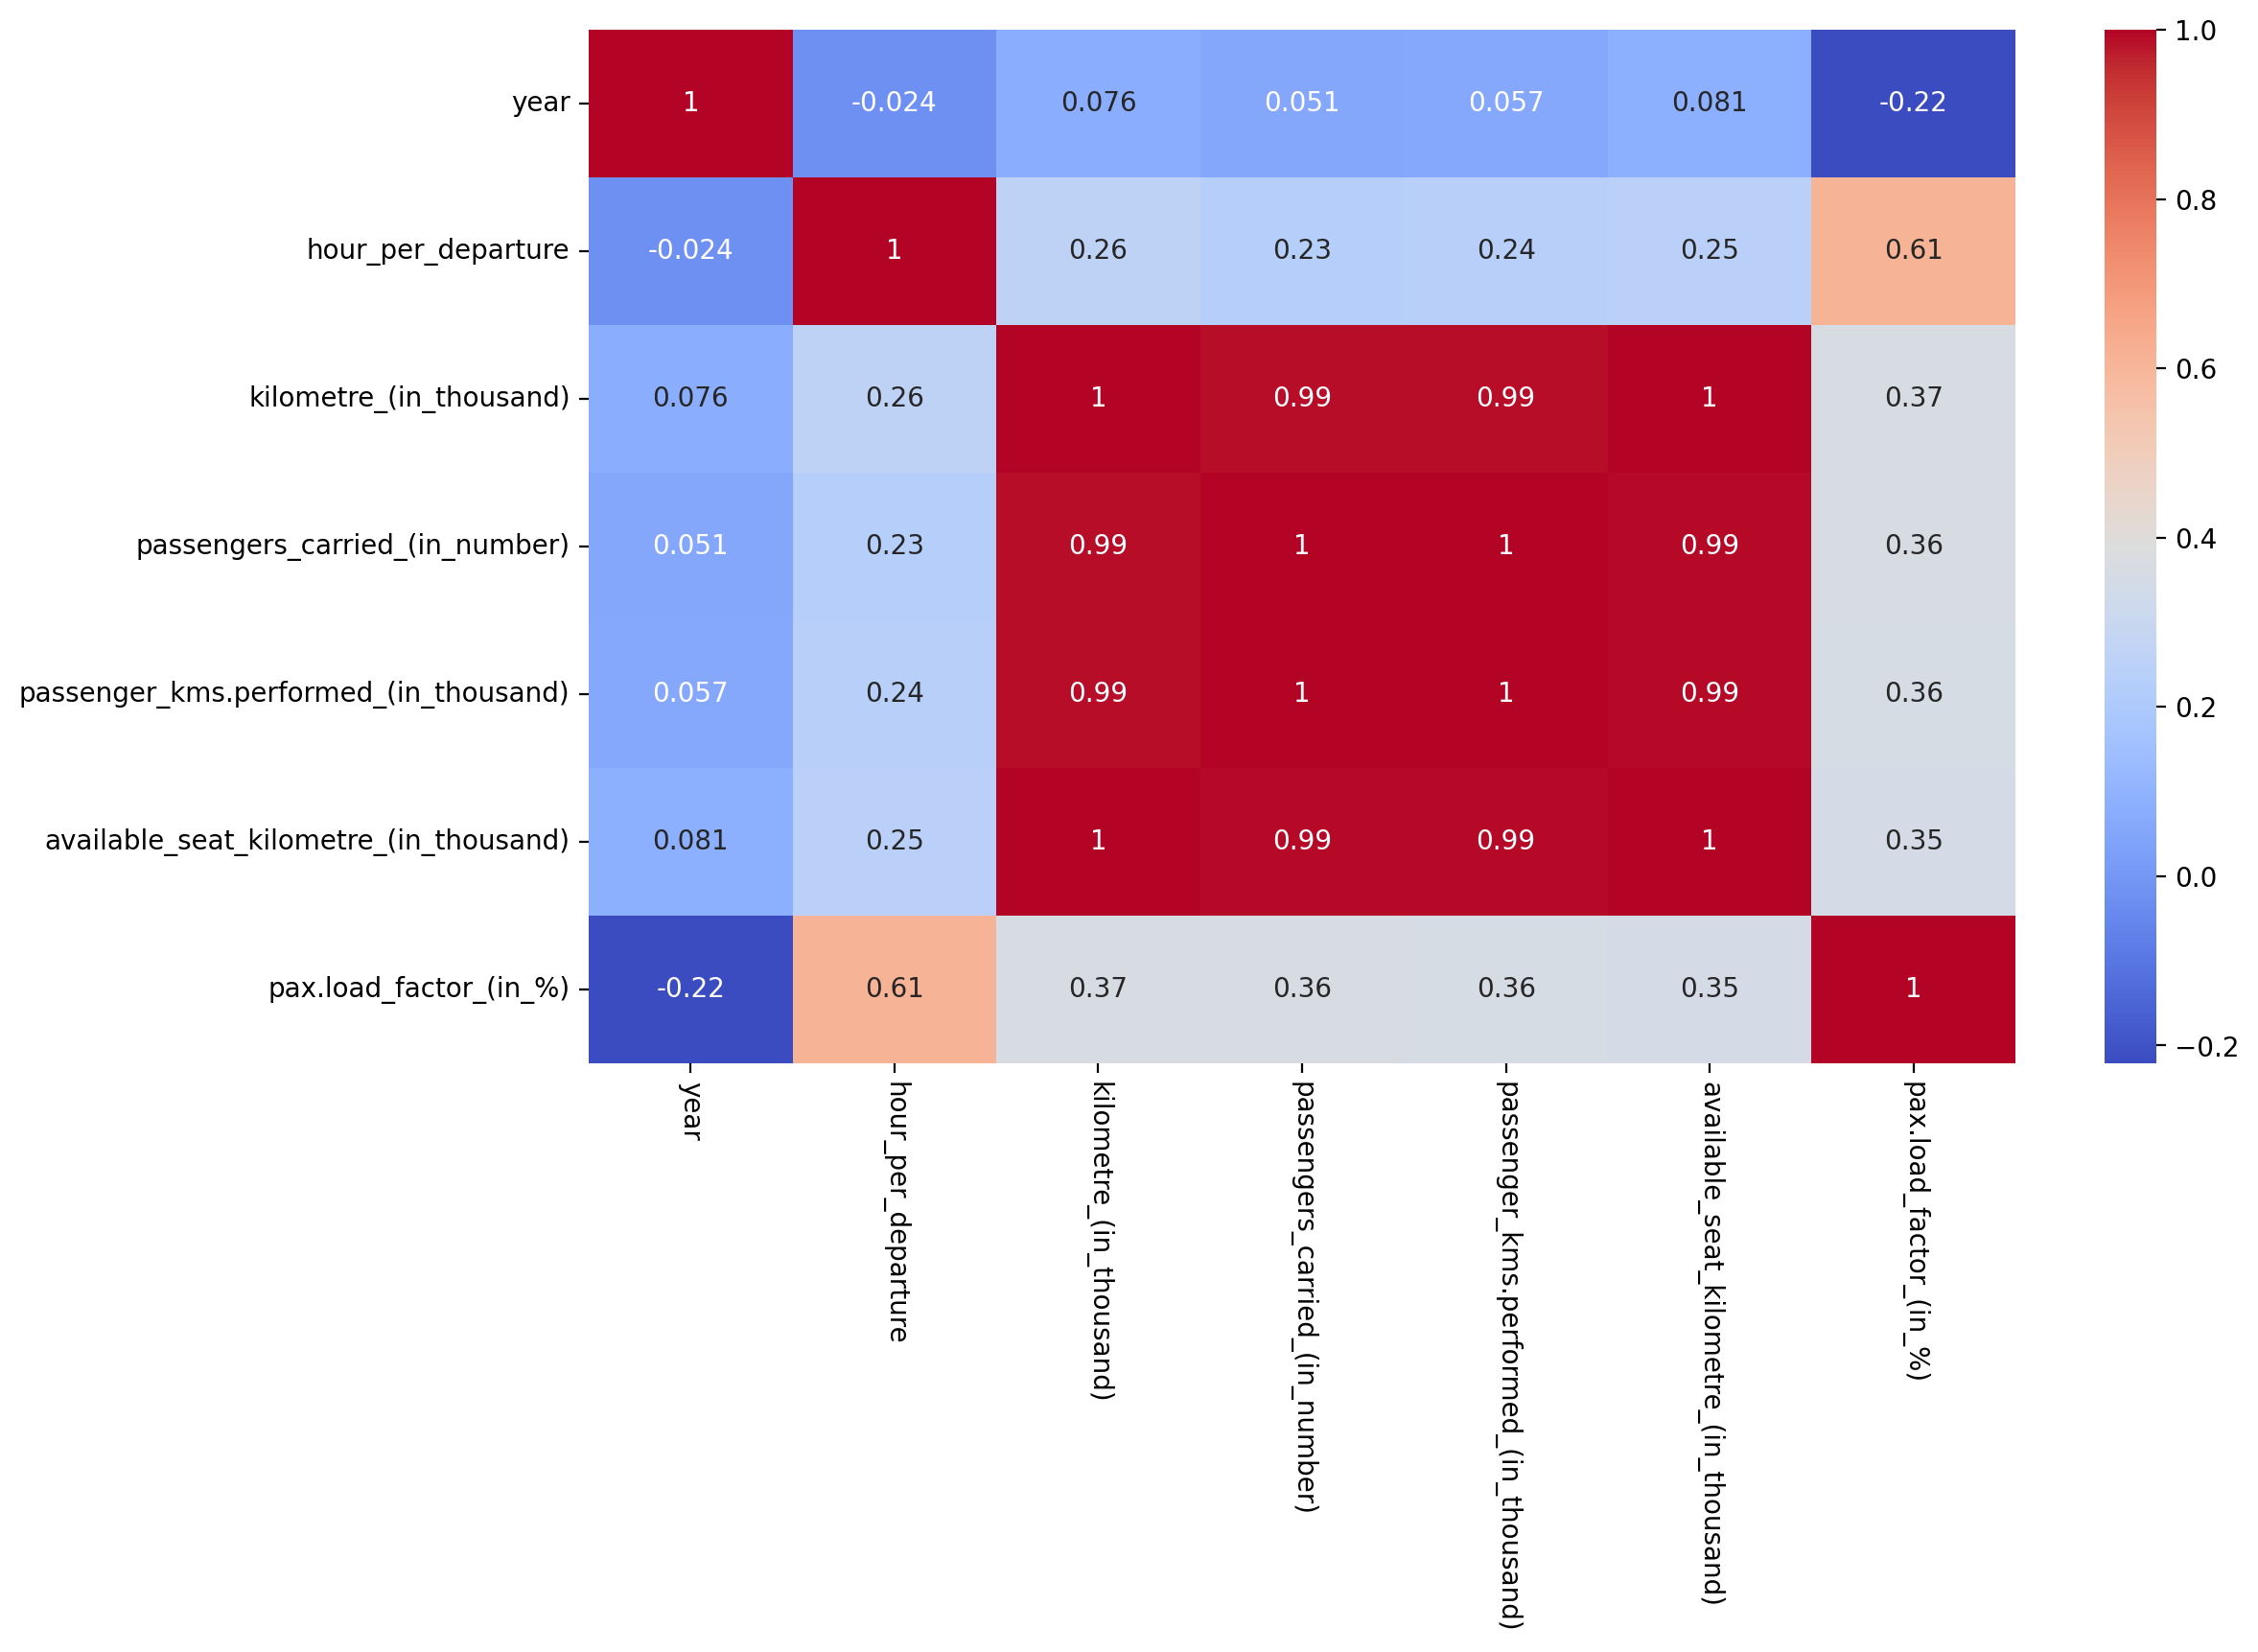

In [538]:
corr = df_passenger.corr(numeric_only=True)
plt.figure(figsize=(12,7), dpi=200)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=270)
plt.show()

In [539]:
df_passenger.drop(['month', 'year', 'date', 'passenger_kms.performed_(in_thousand)', 'available_seat_kilometre_(in_thousand)'], axis=1,inplace=True)

In [540]:
df_passenger['airlines'] = df_passenger['airlines'].astype('category')
df_passenger['airlines'] = df_passenger['airlines'].cat.codes
df_passenger

,airlines,hour_per_departure,kilometre_(in_thousand),passengers_carried_(in_number),pax.load_factor_(in_%)
0,0,1.311706,501.000,81434,76.270848
1,18,1.347963,206.000,14999,45.416667
2,12,1.766536,15520.000,2276404,85.162216
3,5,1.718310,60.000,14633,84.233629
5,11,1.889790,3830.000,552971,79.214238
...,...,...,...,...,...
1205,8,1.282982,2263.000,125358,66.987218
1206,4,1.952629,8982.624,935686,76.454980
1207,16,1.443613,414.068,21315,82.260769
1209,10,1.199588,1315.220,10244,61.169148


In [541]:
df_cargo

,airlines,year,date,month,departures_(in_number),hours_(in_number),kilometre_(in_thousand),freight_(in_tonne),mail_(in_tonne),total_(in_tonne),passenger_(in_thousand),freight_(in_thousand),mail_(in_thousand),total_(in_thousand),available_tonne_kilometre_(in_thousand),weight_load_factor_(in_%)
0,AIR ASIA,2015,2015-01-01,Jan,598,784.40000,501.000,529.300,0.000000,529.300000,5803.10000,6.194000e+02,0.000000,6.422500e+03,1.346190e+04,47.708719
1,VISTARA,2015,2015-01-01,Jan,216,291.16000,206.000,0.000,0.000000,0.000000,1038.00000,0.000000e+00,0.000000,1.038000e+03,2.971845e+03,34.927797
2,INDIGO,2015,2015-01-01,Jan,16280,28759.21000,15520.000,9801.000,899.000000,10700.000000,214082.00000,1.194600e+04,1081.000000,2.271090e+05,2.824570e+05,80.404805
3,AIR INDIA EXPRESS,2015,2015-01-01,Jan,71,122.00000,60.000,0.000,0.000000,0.000000,979.10000,5.530000e+00,0.020000,9.846500e+02,1.586710e+03,62.056078
4,BLUE DART,2015,2015-01-01,Jan,469,834.00000,435.000,10218.800,0.000000,10218.800000,0.00000,9.822480e+06,0.000000,9.822480e+06,1.366091e+07,71.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,ALLIANCE AIR,2021,2021-12-01,Dec,3085,3958.00000,2263.000,29.420,0.000000,29.420000,5122.00000,1.600000e+01,0.000000,5.138000e+03,7.793000e+03,65.930964
1206,AIR INDIA,2021,2021-12-01,Dec,7810,15250.03333,8982.624,6344.995,1.616695,6346.611695,90375.66317,7.965549e+03,0.138856,9.834135e+04,1.395572e+05,70.466722
1207,STAR AIR,2021,2021-12-01,Dec,537,775.22000,414.068,0.000,0.000000,0.000000,1532.77000,0.000000e+00,0.000000,1.532770e+03,9.109496e+03,16.826068
1209,FLY BIG,2021,2021-12-01,Dec,243,291.50000,1315.220,0.000,0.000000,0.000000,298.80000,0.000000e+00,0.000000,2.988000e+02,1.990120e+03,15.014170


In [542]:
fig = px.line(data_frame=df_cargo, x='date', y = 'total_(in_tonne)', color='airlines')
fig.show()

In [543]:
fig = px.line(data_frame=df_cargo, x='date', y = 'total_(in_thousand)', color='airlines')
fig.show()

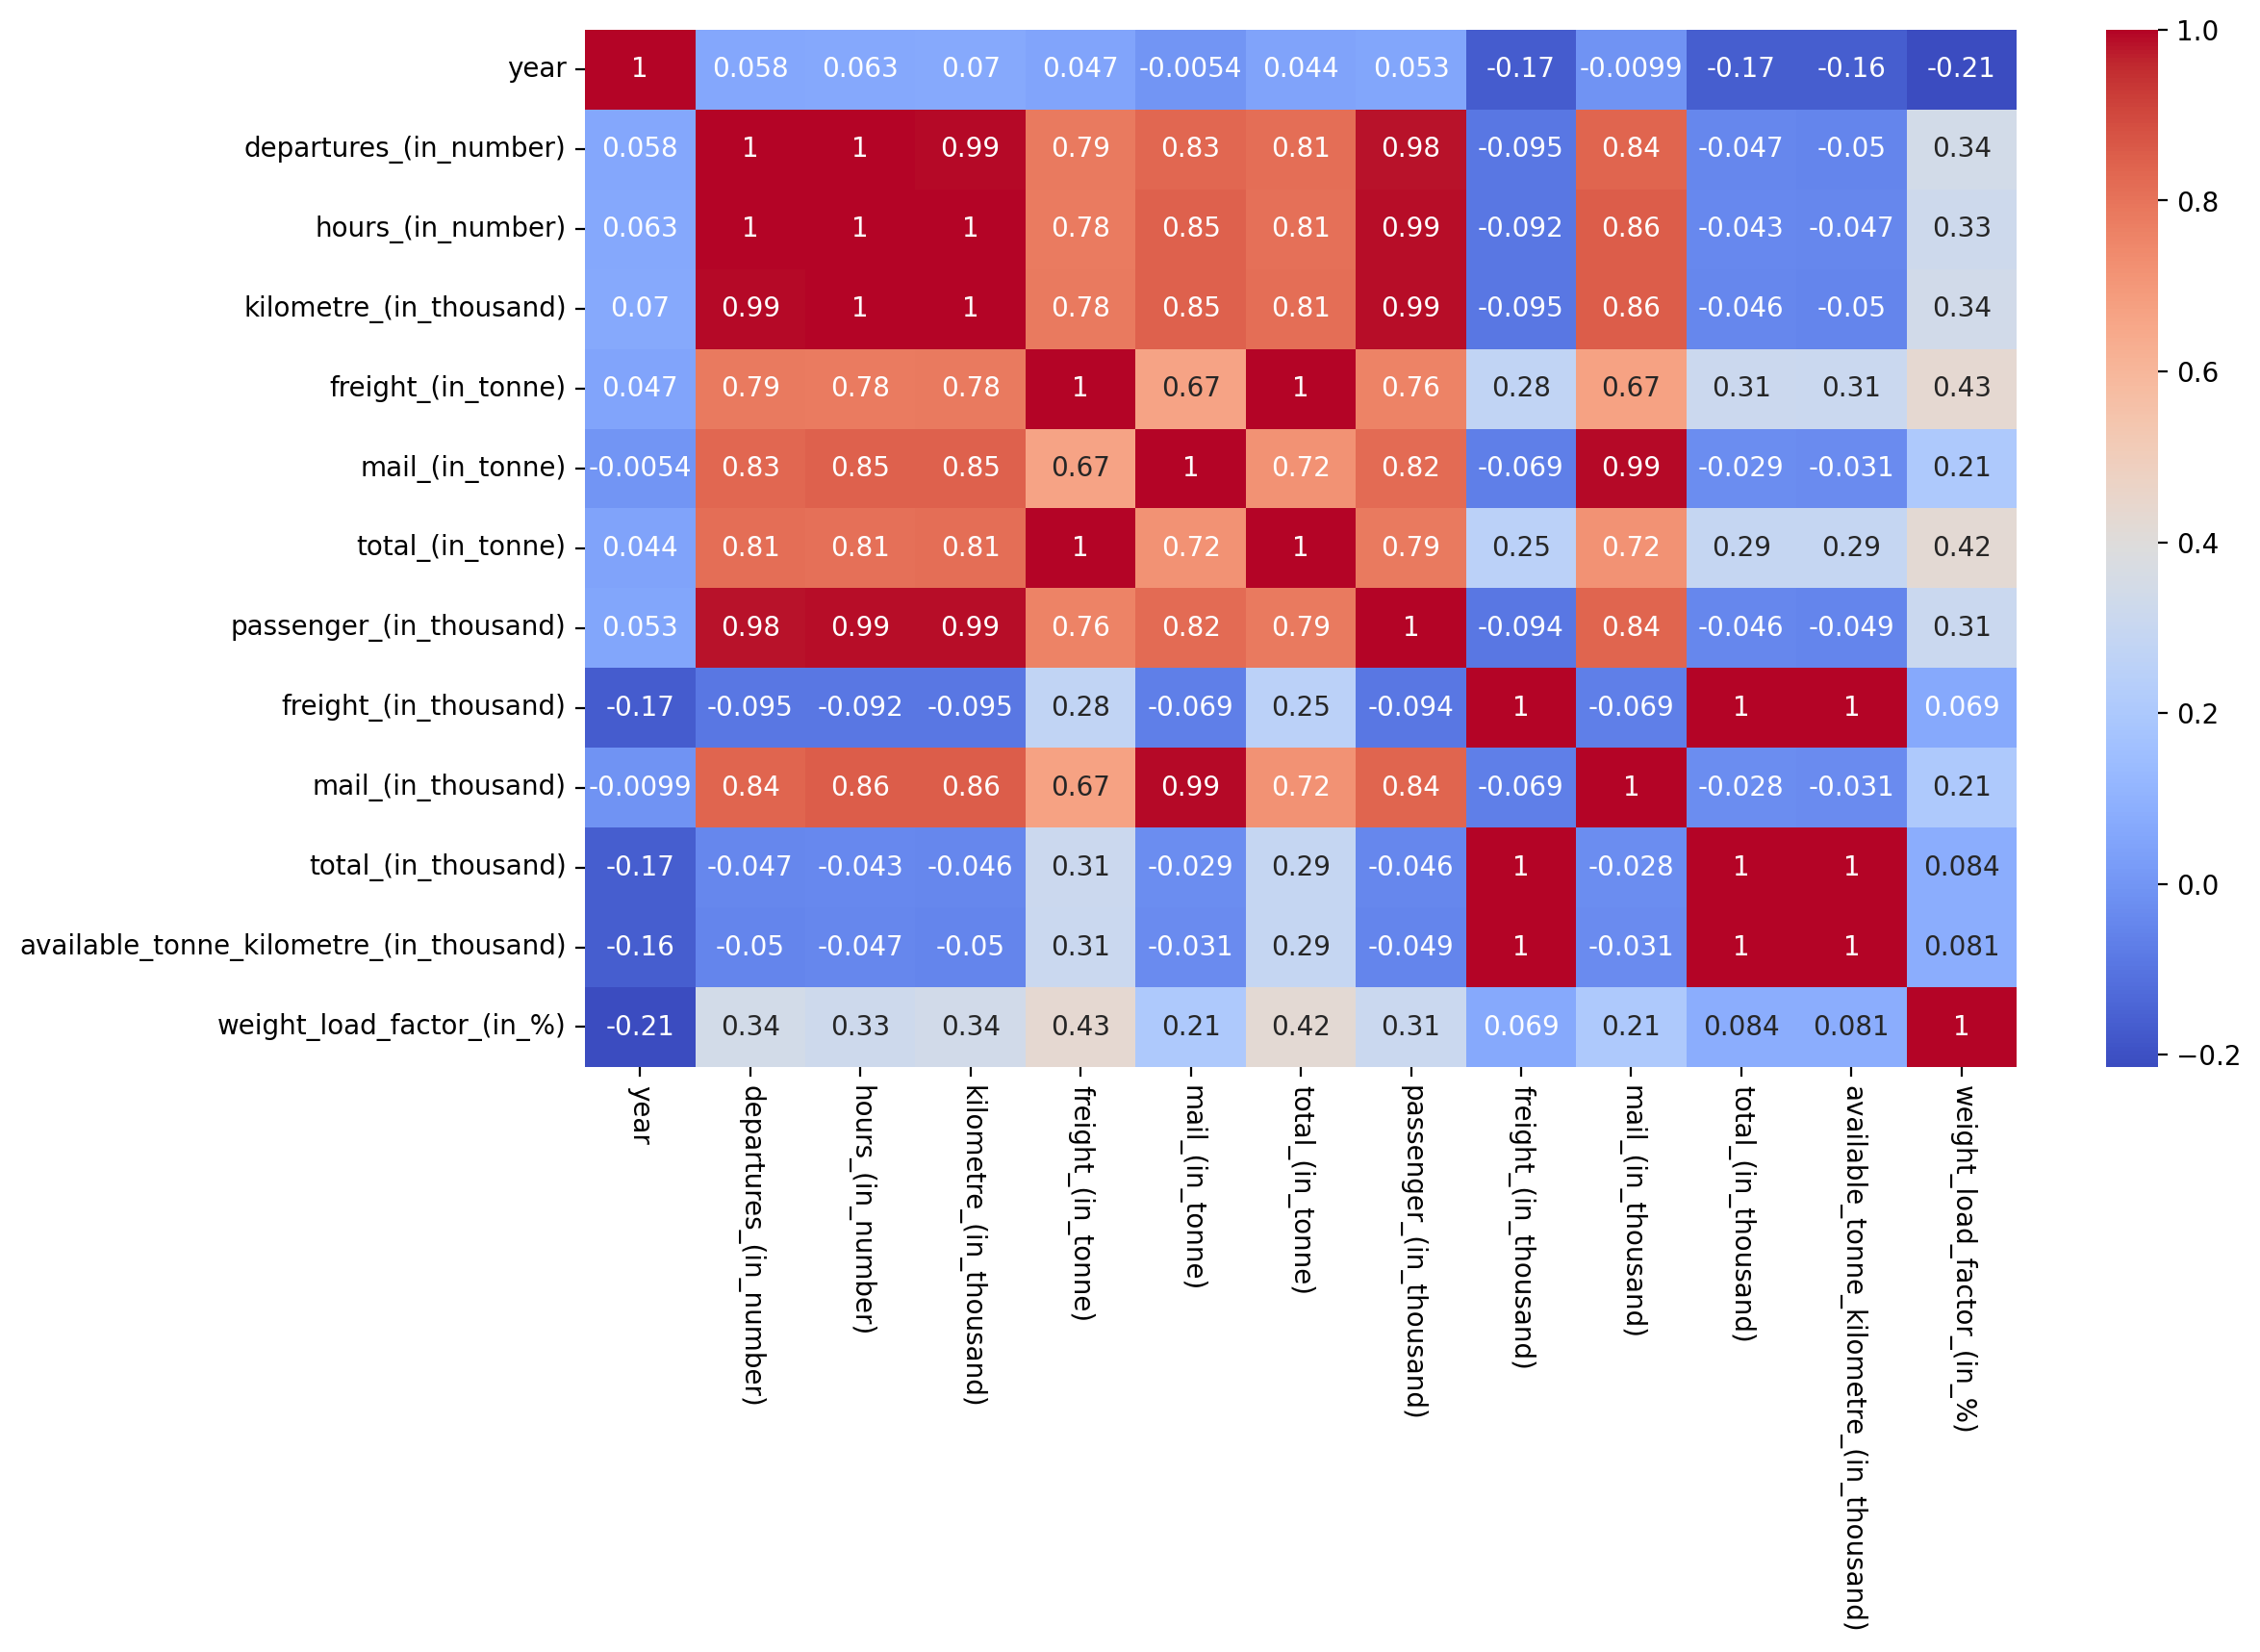

In [544]:
corr = df_cargo.corr(numeric_only=True)
plt.figure(figsize=(12,7), dpi=200)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=270)
plt.show()

In [545]:
df_cargo['hour_per_departure'] = df_cargo['hours_(in_number)']/df_cargo['departures_(in_number)']
df_cargo.insert(4,'hour_per_departure',df_cargo.pop('hour_per_departure'))
df_cargo.drop(['year', 'month', 'departures_(in_number)', 'hours_(in_number)', 'total_(in_tonne)', 'total_(in_thousand)', 'mail_(in_thousand)'], axis=1, inplace=True)
df_cargo

,airlines,date,hour_per_departure,kilometre_(in_thousand),freight_(in_tonne),mail_(in_tonne),passenger_(in_thousand),freight_(in_thousand),available_tonne_kilometre_(in_thousand),weight_load_factor_(in_%)
0,AIR ASIA,2015-01-01,1.311706,501.000,529.300,0.000000,5803.10000,6.194000e+02,1.346190e+04,47.708719
1,VISTARA,2015-01-01,1.347963,206.000,0.000,0.000000,1038.00000,0.000000e+00,2.971845e+03,34.927797
2,INDIGO,2015-01-01,1.766536,15520.000,9801.000,899.000000,214082.00000,1.194600e+04,2.824570e+05,80.404805
3,AIR INDIA EXPRESS,2015-01-01,1.718310,60.000,0.000,0.000000,979.10000,5.530000e+00,1.586710e+03,62.056078
4,BLUE DART,2015-01-01,1.778252,435.000,10218.800,0.000000,0.00000,9.822480e+06,1.366091e+07,71.900000
...,...,...,...,...,...,...,...,...,...,...
1205,ALLIANCE AIR,2021-12-01,1.282982,2263.000,29.420,0.000000,5122.00000,1.600000e+01,7.793000e+03,65.930964
1206,AIR INDIA,2021-12-01,1.952629,8982.624,6344.995,1.616695,90375.66317,7.965549e+03,1.395572e+05,70.466722
1207,STAR AIR,2021-12-01,1.443613,414.068,0.000,0.000000,1532.77000,0.000000e+00,9.109496e+03,16.826068
1209,FLY BIG,2021-12-01,1.199588,1315.220,0.000,0.000000,298.80000,0.000000e+00,1.990120e+03,15.014170


In [546]:
df_cargo['airlines'] = df_cargo['airlines'].astype('category')
df_cargo['airlines'] = df_cargo['airlines'].cat.codes
df_cargo.drop(['date'], axis=1, inplace=True)
df_cargo

,airlines,hour_per_departure,kilometre_(in_thousand),freight_(in_tonne),mail_(in_tonne),passenger_(in_thousand),freight_(in_thousand),available_tonne_kilometre_(in_thousand),weight_load_factor_(in_%)
0,0,1.311706,501.000,529.300,0.000000,5803.10000,6.194000e+02,1.346190e+04,47.708719
1,19,1.347963,206.000,0.000,0.000000,1038.00000,0.000000e+00,2.971845e+03,34.927797
2,13,1.766536,15520.000,9801.000,899.000000,214082.00000,1.194600e+04,2.824570e+05,80.404805
3,5,1.718310,60.000,0.000,0.000000,979.10000,5.530000e+00,1.586710e+03,62.056078
4,9,1.778252,435.000,10218.800,0.000000,0.00000,9.822480e+06,1.366091e+07,71.900000
...,...,...,...,...,...,...,...,...,...
1205,8,1.282982,2263.000,29.420,0.000000,5122.00000,1.600000e+01,7.793000e+03,65.930964
1206,4,1.952629,8982.624,6344.995,1.616695,90375.66317,7.965549e+03,1.395572e+05,70.466722
1207,17,1.443613,414.068,0.000,0.000000,1532.77000,0.000000e+00,9.109496e+03,16.826068
1209,11,1.199588,1315.220,0.000,0.000000,298.80000,0.000000e+00,1.990120e+03,15.014170
